# Home Price Prediction
## Multi-Variate Home Price Prediction Using Linear Regression

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

In [23]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


## Understanding Dataset
Findings:
1. price is dependent on fields area, bedrooms and age. So, price is **dependent variable** and area, bedrooms and age are **independent variables** or **features**
2. So, the linear regression formula will look like this:
```
    price =  m1 * area + m2 * bedrooms + m3 * age + b
```
Generic formula:
```
    y =  m1x1 + m2x2 + m3x3 +b
```
where
- m1, m2 and m3 are termed as coefficients
- b is the intercept
- are, bedrooms and age are features(independent variables)
- price is dependent variable

3. data contains null/NaN values. So we need to take care of it
4. As the house gets older the price gets down e.g. 
   - area = 3600, bedrooms =3 but age = 40 has leeser price value 595000 as compared to
   - area = 3200, bedrooms = NaN (lets assume 3) and age =18 has price valye 61000


## Handling Missing Dataset

In [24]:
# Lets take median of the bedrooms
df.bedrooms.median()

4.0

In [25]:
# Lets take out mode of the bedrooms
df.bedrooms.mode()

0    3.0
Name: bedrooms, dtype: float64

In [27]:
# Lets take value of mode as it looks more promising then median here.
# and assign this value to the NaN value in dataframe
import math
bedroom_mode = math.floor(df.bedrooms.mode())
df.bedrooms = df.bedrooms.fillna(bedroom_mode)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


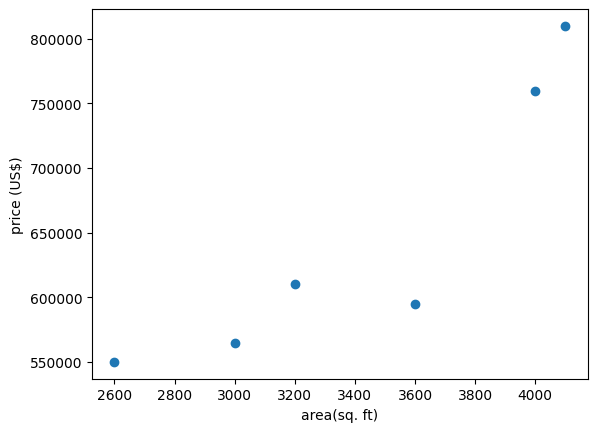

In [28]:
plt.xlabel('area(sq. ft)')
plt.ylabel('price (US$)')
plt.scatter(df.area, df.price)
plt.show()

## Training the Model

In [34]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

LinearRegression()

In [35]:
reg.coef_

array([  119.67905405, 13097.24903475, -4207.28764479])

**So we can see three values which are corresponding to 3 variables area, bedrooms and price, first value corresponds to area, second to bedrooms and third to age**

In [36]:
reg.intercept_ #corresponds to intercept that is value of b in linear model formula

256461.14864864905

In [37]:
reg.predict([[3500, 3.0, 10]])

array([672556.70849421])